In [2]:
## Linear Regression for salary hike

import numpy as np
import pandas as pd

ds = pd.read_csv("/content/Salary_Data.csv")
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
ds.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
ds.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

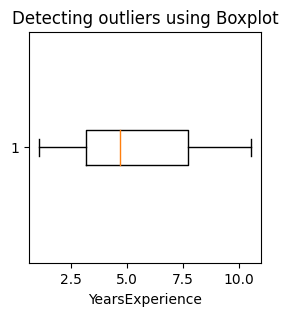

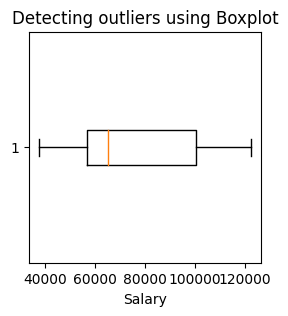

In [10]:
# Checking for any outliers

import matplotlib.pyplot as plt
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'int64' or dict(ds.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(ds[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

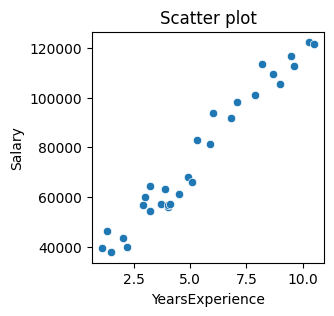

In [11]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = ds['YearsExperience'], y= ds['Salary'], data = ds)
plt.title('Scatter plot')
plt.show()

In [15]:
# lets assign a variables to the columns

xs = ds[['YearsExperience']]
ys = ds[['Salary']]


In [16]:
from sklearn.model_selection import train_test_split

In [20]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys , test_size= 0.3)


In [23]:
xs_train.shape

(21, 1)

In [22]:

xs_test.shape

(9, 1)

In [24]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg2= LinearRegression()   # Assigning the model to a variable reg
reg2.fit(xs,ys) # training the model

LinearRegression()

In [25]:

# Now our model is ready to test

reg2.predict([[5]]) # gave a random sorting time 5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[73042.01180594]])

In [26]:
# Checking for the test variables

ys_pred =reg2.predict(xs)
ys_pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

Text(0.5, 1.0, 'Salary hike Data')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


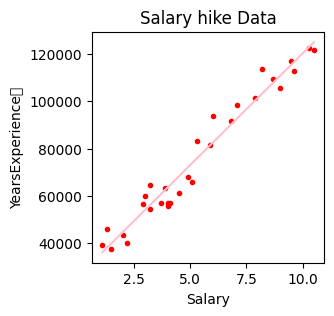

In [27]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(ds[['YearsExperience']], ds[['Salary']], color = 'red', marker = '.')
plt.plot(xs, reg2.predict(xs), color = 'pink')
plt.ylabel('YearsExperience	')
plt.xlabel('Salary')
plt.title('Salary hike Data')


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ys, reg2.predict(xs))
print('Mean squared error',mse.round(3))

print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 31270951.722
Root mean squared error 5592.044


In [36]:
 from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)                      # log transform
transformed_log = transform.fit_transform(xs)
mses = mean_squared_error(ys, reg2.predict(transformed_log))
print('Mean squared error',mse.round(3))

print("Root mean squared error",np.sqrt(mses).round(3))

Mean squared error 31270951.722
Root mean squared error 40736.773


In [37]:
tranformed_square = np.square(xs)                         # Square transform
mse = mean_squared_error(ys,reg2.predict(tranformed_square))
print('Mean squared error',mse.round(3))

print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 167255959612.619
Root mean squared error 408969.387


In [38]:
trans_squ = np.sqrt(xs)                           # Square root Tranform
MSE = mean_squared_error(ys,reg2.predict(trans_squ))
print('Mean squared error',MSE.round(3))
print("Root mean squared error",np.sqrt(MSE).round(3))

Mean squared error 1309012892.692
Root mean squared error 36180.283
